In [240]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import re

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [241]:
# function used to import data into dataframe and get info
def animalDF(file):
    df = pd.read_csv(file)
    print(df.info())
    return df

In [242]:
animals = animalDF('files/train.csv')
test = animalDF('files/test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
ID                11456 non-null int64
Name              8231 non-null object
DateTime          11456 non-null object
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11450 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: int64(1), o

In [243]:
# Determining what features had missing data
animals.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [277]:
print(animals['Name'].value_counts())
print(animals['OutcomeSubtype'].value_counts())
print(animals['SexuponOutcome'].value_counts())
print(animals['AgeuponOutcome'].value_counts())

Has Name    19021
No Name      7708
Name: Name, dtype: int64


KeyError: 'OutcomeSubtype'

In [275]:
print(animals['Color'].nunique())
print(animals['Name'].nunique())
print(animals['AgeuponOutcome'].nunique())
print(animals['AnimalType'].nunique())
print(animals['SexuponOutcome'].nunique())

29
2
36
2


KeyError: 'SexuponOutcome'

In [246]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [247]:
# Splitting SexuponOutcome feature into sex and neutered features.
def sexSplit(data):
    sex = str(data)
    if 'Male' in sex:
        return 'Male'
    else:
        return 'Female'
    
def intactSplit(data):
    intact = str(data)
    if 'Neutered' in intact or 'Spayed' in intact:
        return 'Neutered'
    elif 'Intact' in intact:
        return 'Intact'
    else:
        return "Unknown"
    
animals['Sex'] = animals.SexuponOutcome.apply(sexSplit)
animals['Neutered'] = animals.SexuponOutcome.apply(intactSplit)
test['Sex'] = test.SexuponOutcome.apply(sexSplit)
test['Neutered'] = test.SexuponOutcome.apply(intactSplit)

In [248]:
# Dropping old feature as well as Outcomesubtype, so that each dataset matches
animals = animals.drop(['SexuponOutcome', 'OutcomeSubtype'], axis=1)
test = test.drop('SexuponOutcome', axis=1)

In [249]:
# Change Breed values to either Hybrid or Purebred
def get_mix(data):
    mix = str(data)
    if 'Mix' in mix or '/' in mix:
        return 'Hybrid'
    else:
        return 'Purebred'
animals['Breed'] = animals.Breed.apply(get_mix)
test['Breed'] = test.Breed.apply(get_mix)

In [250]:
animals['AgeuponOutcome'] = animals['AgeuponOutcome'].fillna('1 year')
test['AgeuponOutcome'] = test['AgeuponOutcome'].fillna('1 year')

In [251]:
# Convert Color values into simple colors
def color(data):
    x = str(data)
    split = re.split('/| ', x)
    return split[0]
    
animals['Color'] = animals.Color.apply(color)
test['Color'] = test.Color.apply(color)

In [252]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,1 year,Hybrid,Brown,Male,Neutered
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Cat,1 year,Hybrid,Cream,Female,Neutered
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Dog,2 years,Hybrid,Blue,Male,Neutered
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Cat,3 weeks,Hybrid,Blue,Male,Intact
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Dog,2 years,Hybrid,Tan,Male,Neutered


In [253]:
# Convert Name values to whether an animal has a name or not
def hasName(data):
    x = str(data)
    if 'nan' in x:
        return 'No Name'
    else:
        return 'Has Name'

animals['Name'] = animals.Name.apply(hasName)
test['Name'] = test.Name.apply(hasName)

In [254]:
animals['Name'].value_counts()

Has Name    19021
No Name      7708
Name: Name, dtype: int64

In [255]:
# Convert age in age in weeks
def convert_AgeuponOutcome_to_weeks(df):
    result = {}
    for k in df['AgeuponOutcome'].unique():
        if type(k) != type(""):
            result[k] = -1
        else:
            v1, v2 = k.split()
            if v2 in ["year", "years"]:
                result[k] = int(v1) * 52
            elif v2 in ["month", "months"]:
                result[k] = int(v1) * 4.5
            elif v2 in ["week", "weeks"]:
                result[k] = int(v1)
            elif v2 in ["day", "days"]:
                result[k] = int(v1) / 7
                
    df['AgeuponOutcome'] = df['AgeuponOutcome'].map(result).astype(int)
                
    return df

animals = convert_AgeuponOutcome_to_weeks(animals)
test = convert_AgeuponOutcome_to_weeks(test)

In [256]:
# Convert DateTime into five features Year,Month, Day, Hour, and Minute
def fix_date_time(df):
    def extract_field(_df, start, stop):
        return _df['DateTime'].map(lambda dt: int(dt[start:stop]))
    df['Year'] = extract_field(df,0,4)
    df['Month'] = extract_field(df,5,7)
    df['Day'] = extract_field(df,8,10)
    df['Hour'] = extract_field(df,11,13)
    df['Minute'] = extract_field(df,14,16)
    
    return df.drop(['DateTime'], axis = 1)

animals = fix_date_time(animals)
test = fix_date_time(test)

In [257]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 14 columns):
AnimalID          26729 non-null object
Name              26729 non-null object
OutcomeType       26729 non-null object
AnimalType        26729 non-null object
AgeuponOutcome    26729 non-null int64
Breed             26729 non-null object
Color             26729 non-null object
Sex               26729 non-null object
Neutered          26729 non-null object
Year              26729 non-null int64
Month             26729 non-null int64
Day               26729 non-null int64
Hour              26729 non-null int64
Minute            26729 non-null int64
dtypes: int64(6), object(8)
memory usage: 2.9+ MB


In [258]:
animals.head()

,AnimalID,Name,OutcomeType,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute
0,A671945,Has Name,Return_to_owner,Dog,52,Hybrid,Brown,Male,Neutered,2014,2,12,18,22
1,A656520,Has Name,Euthanasia,Cat,52,Hybrid,Cream,Female,Neutered,2013,10,13,12,44
2,A686464,Has Name,Adoption,Dog,104,Hybrid,Blue,Male,Neutered,2015,1,31,12,28
3,A683430,No Name,Transfer,Cat,3,Hybrid,Blue,Male,Intact,2014,7,11,19,9
4,A667013,No Name,Transfer,Dog,104,Hybrid,Tan,Male,Neutered,2013,11,15,12,52


In [259]:
test.head()

,ID,Name,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute
0,1,Has Name,Dog,45,Hybrid,Red,Female,Intact,2015,10,12,12,15
1,2,Has Name,Dog,104,Hybrid,Black,Female,Neutered,2014,7,26,17,59
2,3,Has Name,Cat,52,Hybrid,Brown,Male,Neutered,2016,1,13,12,20
3,4,Has Name,Dog,18,Hybrid,Tricolor,Male,Intact,2013,12,28,18,12
4,5,Has Name,Dog,104,Hybrid,White,Male,Neutered,2015,9,24,17,59


In [260]:
animals.to_csv('files/cleanTrain.csv', index=False)
test.to_csv('files/cleanTest.csv', index=False)

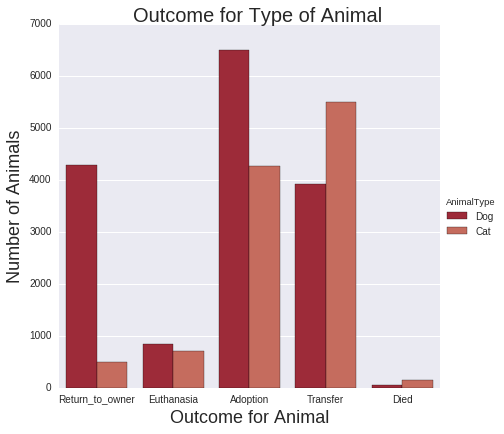

In [268]:
current_palette = sns.color_palette("RdBu", n_colors=9)
g = sns.factorplot(data=animals, x='OutcomeType', hue='AnimalType', kind='count', size=6, palette=current_palette)
plt.subplots_adjust(top=.94)
plt.xlabel('Outcome for Animal', fontsize=18)
plt.ylabel('Number of Animals', fontsize=18)
g.fig.suptitle('Outcome for Type of Animal', fontsize=20)
g.savefig('images/outcome_animal.png')

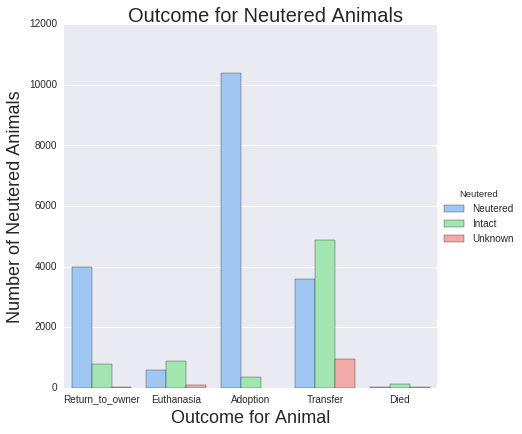

In [269]:
g = sns.factorplot(data=animals, x='OutcomeType', hue='Neutered', kind='count', size=6, palette='pastel')
plt.subplots_adjust(top=.94)
plt.xlabel('Outcome for Animal', fontsize=18)
plt.ylabel('Number of Neutered Animals', fontsize=18)
g.fig.suptitle('Outcome for Neutered Animals', fontsize=20)
g.savefig('images/outcome_neutered.png')

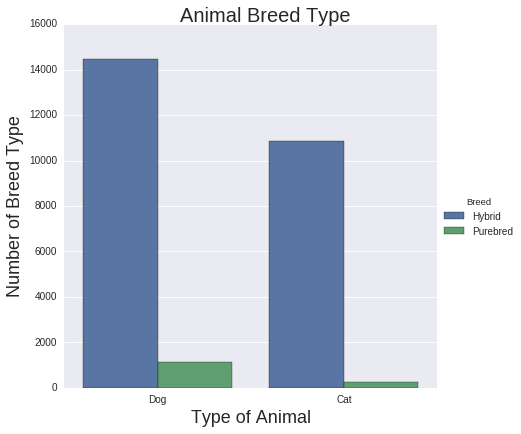

In [270]:
g = sns.factorplot(data=animals, x='AnimalType',hue='Breed', kind='count', size=6)
plt.subplots_adjust(top=.94)
plt.xlabel('Type of Animal', fontsize=18)
plt.ylabel('Number of Breed Type', fontsize=18)
g.fig.suptitle('Animal Breed Type', fontsize=20)
g.savefig('images/animal_breed.png')

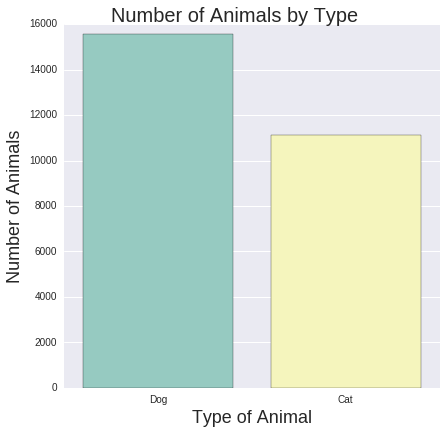

In [271]:
g = sns.factorplot(data=animals, x='AnimalType', kind='count', palette='Set3', size=6)
plt.subplots_adjust(top=.94)
plt.xlabel('Type of Animal', fontsize=18)
plt.ylabel('Number of Animals', fontsize=18)
g.fig.suptitle('Number of Animals by Type', fontsize=20)
g.savefig('images/animal_type.png')